In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import joblib

from google.colab import drive
drive.mount('/content/drive')

# ========== 1. 경로 설정 ==========
train_path = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/train"
val_path = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/validation"
image_size = (64, 64)

def extract_hog_features(base_path):
    data = []
    labels = []

    for label in sorted(os.listdir(base_path)):
        class_dir = os.path.join(base_path, label)
        if not os.path.isdir(class_dir): continue

        for fname in os.listdir(class_dir):
            if fname.lower().endswith(".png"):
                img_path = os.path.join(class_dir, fname)
                img = imread(img_path, as_gray=True)
                img_resized = resize(img, image_size)
                hog_feature = hog(img_resized,
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2),
                                  feature_vector=True)
                data.append(hog_feature)
                labels.append(label)

    return np.array(data), np.array(labels)

# ========== 2. train + validation HOG 특징 추출 ==========
print("[INFO] Extracting train features...")
X_train, y_train_labels = extract_hog_features(train_path)

print("[INFO] Extracting validation features...")
X_val, y_val_labels = extract_hog_features(val_path)

# ========== 3. 레이블 인코딩 및 저장 ==========
all_labels = np.concatenate([y_train_labels, y_val_labels])

encoder = LabelEncoder()
encoder.fit(all_labels)

y_train = encoder.transform(y_train_labels)
y_val = encoder.transform(y_val_labels)

# 저장
joblib.dump((X_train, y_train), "/content/drive/MyDrive/dataset/hog_train.pkl")
joblib.dump((X_val, y_val), "/content/drive/MyDrive/dataset/hog_val.pkl")
joblib.dump(encoder, "/content/drive/MyDrive/dataset/hog_label_encoder.pkl")


print("[✔️] HOG 특징 추출 및 저장 완료")
print(f"Train: {X_train.shape}, Val: {X_val.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Extracting train features...
[INFO] Extracting validation features...
[✔️] HOG 특징 추출 및 저장 완료
Train: (8404, 1764), Val: (935, 1764)


NameError: name 'y_test_bin' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
import os

train_dir = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/train"
val_dir = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/validation"

def count_samples(folder_path):
    total = 0
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            total += len(os.listdir(class_path))
    return total

train_samples = count_samples(train_dir)
val_samples = count_samples(val_dir)

print(f"Train Samples: {train_samples}")
print(f"Validation Samples: {val_samples}")


Train Samples: 8404
Validation Samples: 935


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import joblib
from sklearn.metrics import classification_report, accuracy_score

from google.colab import drive
drive.mount('/content/drive')

# ========== 1. 경로 설정 ==========
test_path = "/content/drive/MyDrive/dataset/MalImg dataset/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation"
image_size = (64, 64)

# ========== 2. 저장된 인코더 및 모델 로드 ==========
encoder = joblib.load("/content/drive/MyDrive/dataset/hog_label_encoder.pkl")
model_paths = {
    "RandomForest": "/content/drive/MyDrive/dataset/malimg_hog_RandomForest.pkl",
    "SVM": "/content/drive/MyDrive/dataset/malimg_hog_SVM.pkl"
}

# ========== 3. 테스트 데이터 로드 및 전처리 ==========
X_test = []
y_test = []

for label in os.listdir(test_path):
    label_dir = os.path.join(test_path, label)
    for fname in os.listdir(label_dir):
        if fname.lower().endswith(".png"):
            path = os.path.join(label_dir, fname)
            img = imread(path, as_gray=True)
            img_resized = resize(img, image_size)
            hog_feature = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            X_test.append(hog_feature)
            y_test.append(label)

X_test = np.array(X_test)
y_test_encoded = encoder.transform(y_test)

# ========== 4. 모델별 테스트 ==========
for model_name, model_path in model_paths.items():
    print(f"\n[Testing {model_name}]")
    model = joblib.load(model_path)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_encoded, y_pred, target_names=encoder.classes_))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

[Testing RandomForest]
Accuracy: 0.9188
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        25
     Allaple.A       0.90      0.99      0.95       114
     Allaple.L       0.99      0.92      0.95       100
 Alueron.gen!J       1.00      1.00      1.00        25
     Autorun.K       1.00      1.00      1.00        25
       C2LOP.P       0.79      0.76      0.78        25
   C2LOP.gen!g       0.62      0.96      0.75        25
Dialplatform.B       1.00      1.00      1.00        25
     Dontovo.A       1.00      1.00      1.00        25
      Fakerean       1.00      0.99      0.99        75
 Instantaccess       1.00      1.00      1.00        75
    Lolyda.AA1       1.00      1.00      1.00        60
    Lolyda.AA2       1.00      1.00      1.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy: 0.9058
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        25
     Allaple.A       0.95      0.97      0.96       114
     Allaple.L       0.97      0.96      0.96       100
 Alueron.gen!J       1.00      1.00      1.00        25
     Autorun.K       0.00      0.00      0.00        25
       C2LOP.P       0.88      0.88      0.88        25
   C2LOP.gen!g       0.69      1.00      0.82        25
Dialplatform.B       1.00      1.00      1.00        25
     Dontovo.A       1.00      1.00      1.00        25
      Fakerean       1.00      0.99      0.99        75
 Instantaccess       1.00      1.00      1.00        75
    Lolyda.AA1       1.00      1.00      1.00        60
    Lolyda.AA2       1.00      1.00      1.00        25
    Lolyda.AA3       1.00      1.00      1.00        25
     Lolyda.AT       0.96      1.00      0.98        25
   Malex.gen!J       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# ========== 1. 데이터 로드 ==========
X_train, y_train = joblib.load("/content/drive/MyDrive/dataset/hog_train.pkl")
X_val, y_val = joblib.load("/content/drive/MyDrive/dataset/hog_val.pkl")
encoder = joblib.load("/content/drive/MyDrive/dataset/hog_label_encoder.pkl")

# ========== 2. 모델 정의 ==========
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True)
}

# ========== 3. 학습 및 평가 ==========
for name, model in models.items():
    print(f"\n[Training {name}]")
    model.fit(X_train, y_train)

    print(f"[Testing {name}]")
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, target_names=encoder.classes_))

    # 모델 저장
    joblib.dump(model, f"/content/drive/MyDrive/dataset/malimg_hog_{name}.pkl")



[Training RandomForest]
[Testing RandomForest]
Accuracy: 0.9198
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        25
     Allaple.A       0.91      0.99      0.95       125
     Allaple.L       0.99      0.92      0.95       100
 Alueron.gen!J       1.00      1.00      1.00        25
     Autorun.K       1.00      1.00      1.00        25
       C2LOP.P       0.79      0.76      0.78        25
   C2LOP.gen!g       0.62      0.96      0.75        25
Dialplatform.B       1.00      1.00      1.00        25
     Dontovo.A       1.00      1.00      1.00        25
      Fakerean       1.00      0.99      0.99        75
 Instantaccess       1.00      1.00      1.00        75
    Lolyda.AA1       1.00      1.00      1.00        60
    Lolyda.AA2       1.00      1.00      1.00        25
    Lolyda.AA3       1.00      1.00      1.00        25
     Lolyda.AT       1.00      1.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


[Training SVM]
[Testing SVM]
Accuracy: 0.9070
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        25
     Allaple.A       0.95      0.98      0.96       125
     Allaple.L       0.97      0.96      0.96       100
 Alueron.gen!J       1.00      1.00      1.00        25
     Autorun.K       0.00      0.00      0.00        25
       C2LOP.P       0.88      0.88      0.88        25
   C2LOP.gen!g       0.69      1.00      0.82        25
Dialplatform.B       1.00      1.00      1.00        25
     Dontovo.A       1.00      1.00      1.00        25
      Fakerean       1.00      0.99      0.99        75
 Instantaccess       1.00      1.00      1.00        75
    Lolyda.AA1       1.00      1.00      1.00        60
    Lolyda.AA2       1.00      1.00      1.00        25
    Lolyda.AA3       1.00      1.00      1.00        25
     Lolyda.AT       0.96      1.00      0.98        25


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import os
import numpy as np
import joblib
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# ====== Google Drive 연결 (Colab 전용) ======
from google.colab import drive
drive.mount('/content/drive')

# ====== 1. 경로 설정 ======
base_path = "/content/drive/MyDrive/dataset"
train_data_path = os.path.join(base_path, "hog_train.pkl")
val_data_path = os.path.join(base_path, "hog_val.pkl")
encoder_path = os.path.join(base_path, "hog_label_encoder.pkl")

# ====== 2. 데이터 로드 ======
X_train, y_train = joblib.load(train_data_path)
X_val, y_val = joblib.load(val_data_path)
encoder = joblib.load(encoder_path)

# ====== 3. 판단형 모델용 정상 클래스 정의 ======
normal_classes = ['Allaple.A', 'Allaple.L', 'Lolyda.AA1', 'Lolyda.AA2']
normal_class_ids = [encoder.transform([cls])[0] for cls in normal_classes]

# 정상 클래스만 추출하여 학습 데이터 구성
train_mask = np.isin(y_train, normal_class_ids)
X_train_normal = X_train[train_mask]

# ====== 4. 모델 학습 ======
print("[Training One-Class SVM]")
ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')
ocsvm.fit(X_train_normal)

# ====== 5. 테스트 ======
# 실제 레이블: 정상(1), 나머지 악성(-1)
y_true = np.where(np.isin(y_val, normal_class_ids), 1, -1)
y_pred = ocsvm.predict(X_val)

# ====== 6. 성능 평가 ======
print("\n[Classification Report]")
print(classification_report(y_true, y_pred, target_names=["Malware (-1)", "Benign (1)"]))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Training One-Class SVM]

[Classification Report]
              precision    recall  f1-score   support

Malware (-1)       0.90      0.98      0.94       625
  Benign (1)       0.95      0.79      0.86       310

    accuracy                           0.92       935
   macro avg       0.93      0.88      0.90       935
weighted avg       0.92      0.92      0.91       935



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# ========== 1. 경로 설정 ==========
train_dir = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/train"
val_dir = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset/validation"
image_size = (64, 64)
batch_size = 32

# ========== 2. 데이터 증강 ==========
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_aug = ImageDataGenerator(rescale=1./255)

train_gen = train_aug.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = val_aug.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ========== 3. CNN 모델 정의 ==========
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ========== 4. 학습 ==========
history = model.fit(train_gen, validation_data=val_gen, epochs=15)

# ========== 5. 평가 ==========
val_gen.reset()
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print("\n[Classification Report]")
print(classification_report(y_true, y_pred, target_names=class_labels))


Found 8404 images belonging to 25 classes.
Found 935 images belonging to 25 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 181s 656ms/step - accuracy: 0.3713 - loss: 2.1425 - val_accuracy: 0.0791 - val_loss: 6.9264
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 204s 777ms/step - accuracy: 0.5873 - loss: 1.1904 - val_accuracy: 0.1529 - val_loss: 7.7498
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 240s 690ms/step - accuracy: 0.6476 - loss: 0.9450 - val_accuracy: 0.1551 - val_loss: 6.9965
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 202s 766ms/step - accuracy: 0.7074 - loss: 0.7959 - val_accuracy: 0.1187 - val_loss: 13.2415
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 207s 788ms/step - accuracy: 0.7615 - loss: 0.6859 - val_accuracy: 0.3080 - val_loss: 5.4302
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 225s 646ms/step - accuracy: 0.8152 - loss: 0.5412 - val_accuracy: 0.2866 - val_loss: 8.8089
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 218s 704ms/step - accuracy: 0.8335 - loss: 0.5143 - val_accuracy: 0.2289 - val_loss: 9.1253
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 178s 674ms/step - accuracy: 0.8565 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# === 1. 필수 라이브러리 불러오기 ===
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


# === 2. 구글 드라이브 마운트 및 경로 설정 ===
drive.mount('/content/drive')
base_path = "/content/drive/MyDrive/dataset/MalImg dataset/dataset_9010/dataset_9010/malimg_dataset"

# === 3. 데이터 로딩: ImageDataGenerator ===
image_size = (256, 256)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, "train"),
    target_size=image_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_path, "validation"),
    target_size=image_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

# === 4. VGG 스타일 CNN 모델 정의 ===
model = Sequential([
    Input(shape=(256, 256, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # Malimg 데이터셋은 25개 클래스
])

# === 5. 컴파일 및 학습 ===
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8404 images belonging to 25 classes.
Found 935 images belonging to 25 classes.
Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 2630s 10s/step - accuracy: 0.5347 - loss: 1.7708 - val_accuracy: 0.8524 - val_loss: 0.4897
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1744s 7s/step - accuracy: 0.9053 - loss: 0.3412 - val_accuracy: 0.9112 - val_loss: 0.2699
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1770s 7s/step - accuracy: 0.9448 - loss: 0.2019 - val_accuracy: 0.9390 - val_loss: 0.1863
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1749s 7s/step - accuracy: 0.9548 - loss: 0.1649 - val_accuracy: 0.9412 - val_loss: 0.1789
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1752s 7s/step - accuracy: 0.9621 - loss: 0.1317 - val_accuracy: 0.9508 - val_loss: 0.1264
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1773s 7s/step - accuracy: 0.9496 - loss: 0.1607 - val_accuracy: 0.9476 - val_loss: 0.1227
Epoch

30/30 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step
[Classification Report]
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        25
     Agent.FYI       1.00      1.00      1.00        25
     Allaple.A       1.00      1.00      1.00       125
     Allaple.L       1.00      1.00      1.00       100
 Alueron.gen!J       1.00      1.00      1.00        25
     Autorun.K       1.00      1.00      1.00        25
       C2LOP.P       0.85      0.88      0.86        25
   C2LOP.gen!g       0.83      1.00      0.91        25
Dialplatform.B       1.00      1.00      1.00        25
     Dontovo.A       1.00      1.00      1.00        25
      Fakerean       1.00      1.00      1.00        75
 Instantaccess       1.00      1.00      1.00        75
    Lolyda.AA1       1.00      1.00      1.00        60
    Lolyda.AA2       1.00      1.00      1.00        25
    Lolyda.AA3       1.00      1.00      1.00        25
     Lolyda.AT       1.00      1.00     

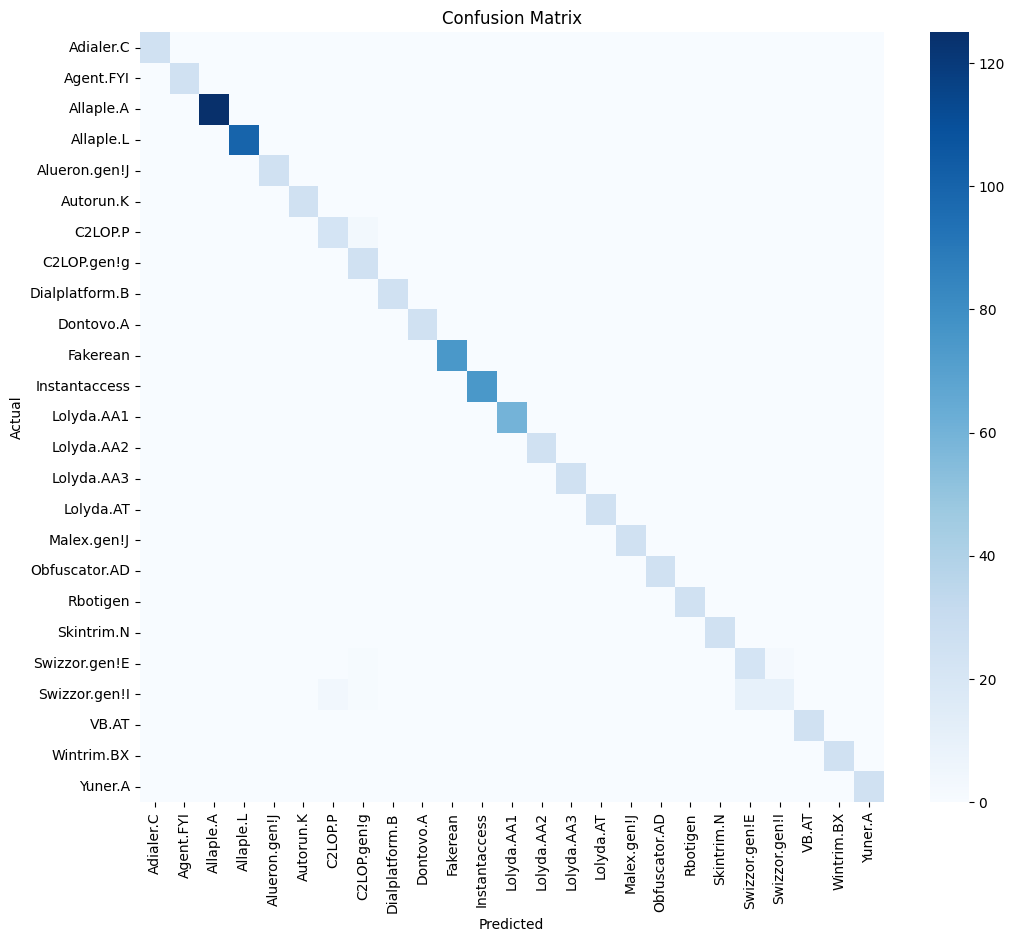

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# ====== 테스트 데이터 준비 ======
val_generator.reset()  # 제너레이터 초기화
y_true = val_generator.classes   # 정답 레이블
class_labels = list(val_generator.class_indices.keys())

# ====== 예측 수행 ======
y_pred_probs = model.predict(val_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# ====== 평가 지표 출력 ======
print("[Classification Report]")
print(classification_report(y_true, y_pred, target_names=class_labels))

# ====== 혼돈 행렬 출력 (선택) ======
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import os
import numpy as np
import joblib
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import load_model

# ========== 1. 경로 설정 ==========
base_path = "/content/drive/MyDrive/dataset"
hog_val_path = os.path.join(base_path, "hog_val.pkl")
rf_model_path = os.path.join(base_path, "malimg_hog_RandomForest.pkl")
svm_model_path = os.path.join(base_path, "malimg_hog_SVM.pkl")
vgg_model_path = os.path.join(base_path, "vgg_malimg_cnn_model.h5")
cnn_test_path = os.path.join(base_path, "X_test_cnn.npy")

# ========== 2. 데이터 로드 ==========
hog_data = joblib.load(hog_val_path)
X_test_hog, y_test = hog_data[0], hog_data[1]

# (⚠️ 핵심 수정) 잘못된 클래스 25를 18로 수정
y_test = np.where(y_test == 25, 18, y_test)

# CNN 입력 이미지
X_test_cnn = np.load(cnn_test_path)

# ========== 3. 모델 로드 ==========
rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)
vgg_model = load_model(vgg_model_path)

# ========== 4. 예측 확률 ==========
y_pred_proba_rf = rf_model.predict_proba(X_test_hog)
y_pred_proba_svm = svm_model.predict_proba(X_test_hog)
y_pred_proba_vgg = vgg_model.predict(X_test_cnn)

# ========== 5. One-hot 인코딩 (정상 클래스 수: 0~24 총 25개) ==========
n_classes = 25
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# ========== 6. AUC 계산 ==========
auc_rf = roc_auc_score(y_test_bin, y_pred_proba_rf, average='macro', multi_class='ovr')
auc_svm = roc_auc_score(y_test_bin, y_pred_proba_svm, average='macro', multi_class='ovr')
auc_vgg = roc_auc_score(y_test_bin, y_pred_proba_vgg, average='macro', multi_class='ovr')

# ========== 7. 결과 출력 ==========
print(f"✅ Random Forest AUC: {auc_rf:.4f}")
print(f"✅ SVM AUC: {auc_svm:.4f}")
print(f"✅ VGG (CNN) AUC: {auc_vgg:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step
✅ Random Forest AUC: 0.8773
✅ SVM AUC: 0.8894
✅ VGG (CNN) AUC: 0.9119


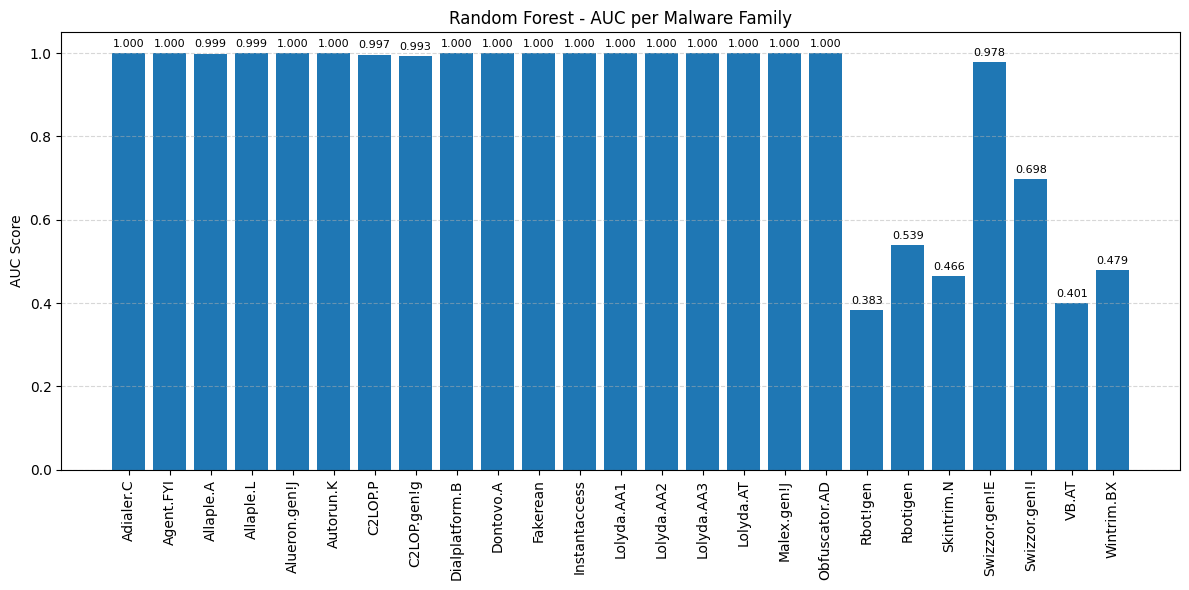

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# 패밀리 이름 (예: 라벨 인코더에서 inverse_transform으로 얻을 수 있음)
# 필요시 직접 지정해도 됨
family_names = label_encoder.inverse_transform(np.arange(25))

# 모델 선택 (예: Random Forest)
y_score = y_pred_proba_rf
model_name = "Random Forest"

# 각 클래스별 AUC 계산
class_auc = []
for i in range(len(family_names)):
    auc_i = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    class_auc.append(auc_i)

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(family_names)), class_auc)
plt.xticks(range(len(family_names)), family_names, rotation=90)
plt.ylim(0.0, 1.05)
plt.ylabel('AUC Score')
plt.title(f'{model_name} - AUC per Malware Family')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 수치 출력
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


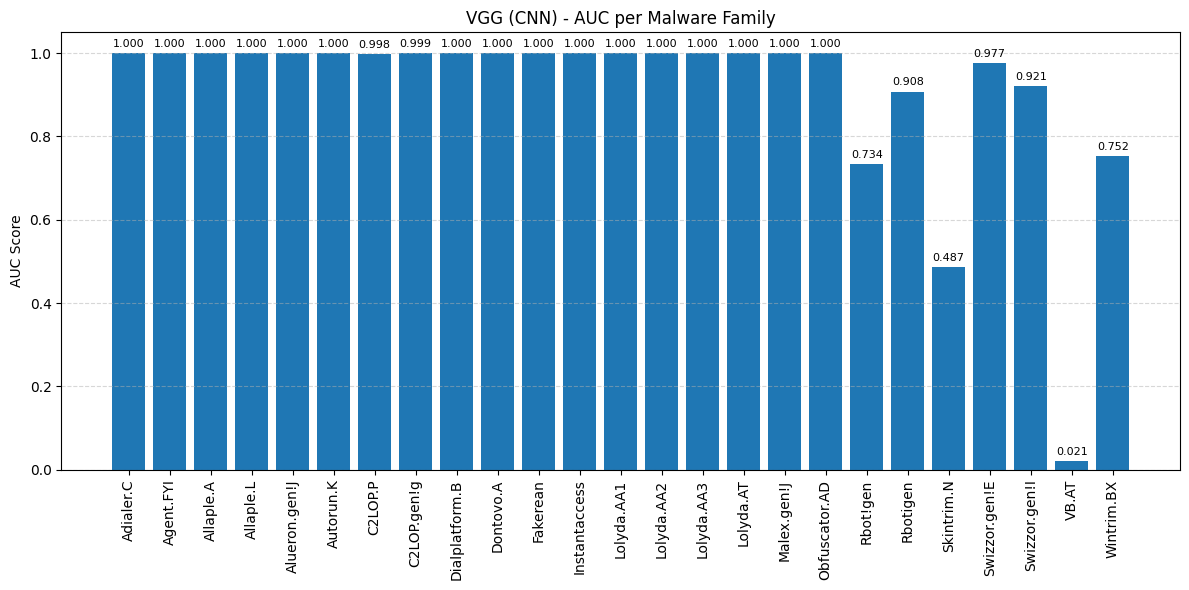

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# 패밀리 이름 (예: 라벨 인코더에서 inverse_transform으로 얻을 수 있음)
# 필요시 직접 지정해도 됨
family_names = label_encoder.inverse_transform(np.arange(25))

# 모델 선택 (예: Random Forest)
# 예: VGG 모델로 할 경우
y_score = y_pred_proba_vgg
model_name = "VGG (CNN)"


# 각 클래스별 AUC 계산
class_auc = []
for i in range(len(family_names)):
    auc_i = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    class_auc.append(auc_i)

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(family_names)), class_auc)
plt.xticks(range(len(family_names)), family_names, rotation=90)
plt.ylim(0.0, 1.05)
plt.ylabel('AUC Score')
plt.title(f'{model_name} - AUC per Malware Family')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 수치 출력
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


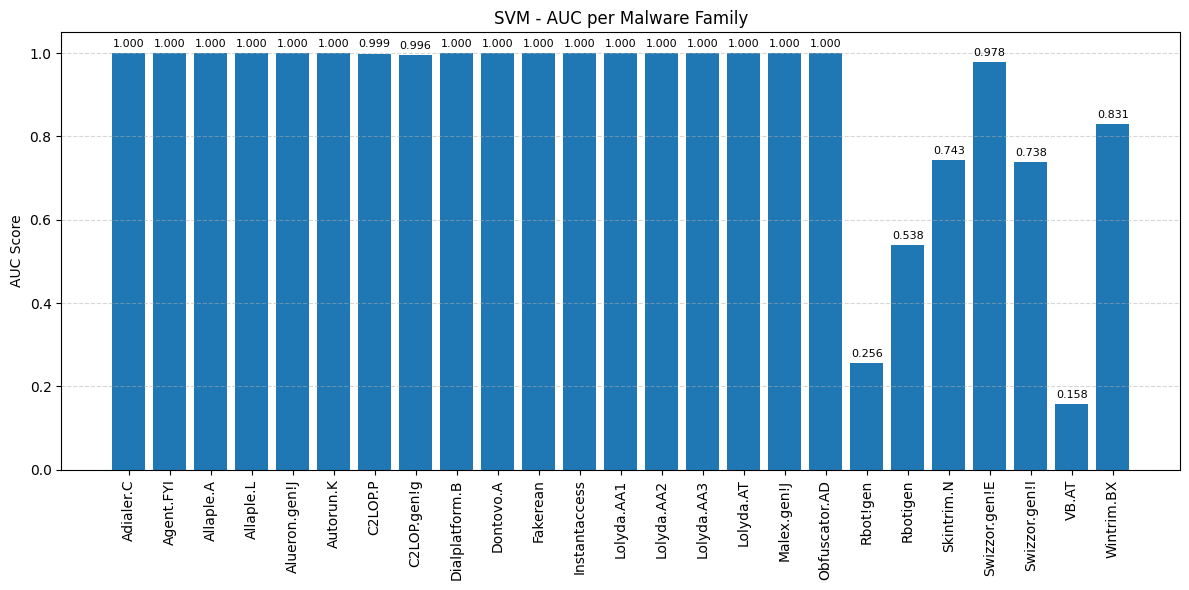

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# 패밀리 이름 (예: 라벨 인코더에서 inverse_transform으로 얻을 수 있음)
# 필요시 직접 지정해도 됨
family_names = label_encoder.inverse_transform(np.arange(25))

# 모델 선택 (예: Random Forest)
y_score = y_pred_proba_svm
model_name = "SVM"

# 각 클래스별 AUC 계산
class_auc = []
for i in range(len(family_names)):
    auc_i = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    class_auc.append(auc_i)

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(family_names)), class_auc)
plt.xticks(range(len(family_names)), family_names, rotation=90)
plt.ylim(0.0, 1.05)
plt.ylabel('AUC Score')
plt.title(f'{model_name} - AUC per Malware Family')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 수치 출력
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


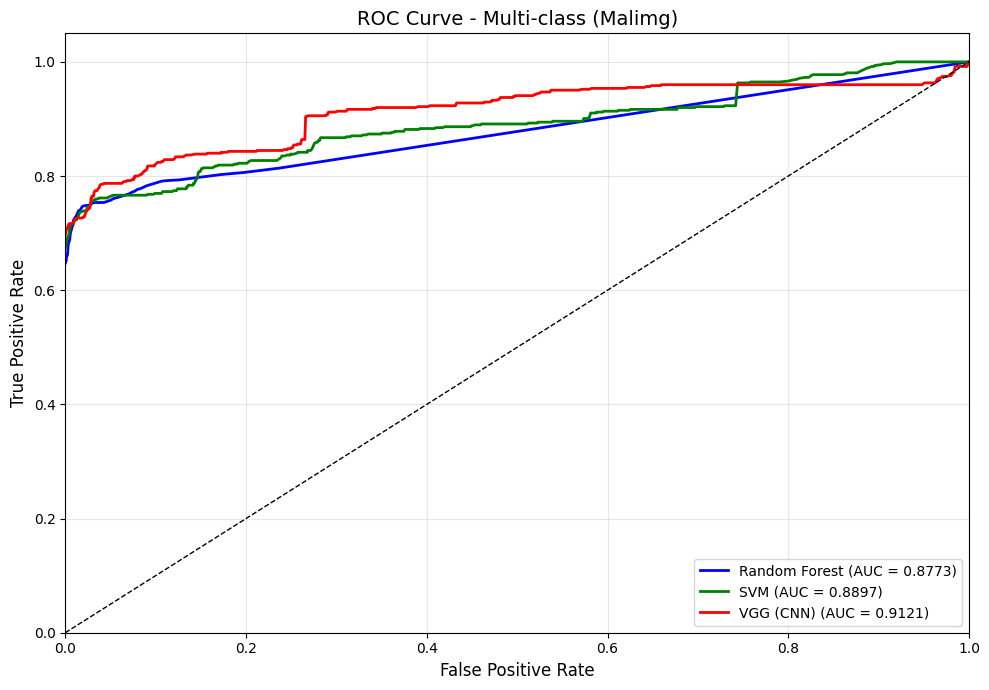

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve(y_true_bin, y_score, model_name, color):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_score.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average 계산
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot
    plt.plot(all_fpr, mean_tpr, color=color, lw=2,
             label=f'{model_name} (AUC = {macro_auc:.4f})')


# === 그래프 시각화 시작 ===
plt.figure(figsize=(10, 7))
plot_roc_curve(y_test_bin, y_pred_proba_rf, "Random Forest", 'blue')
plot_roc_curve(y_test_bin, y_pred_proba_svm, "SVM", 'green')
plot_roc_curve(y_test_bin, y_pred_proba_vgg, "VGG (CNN)", 'red')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Multi-class (Malimg)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


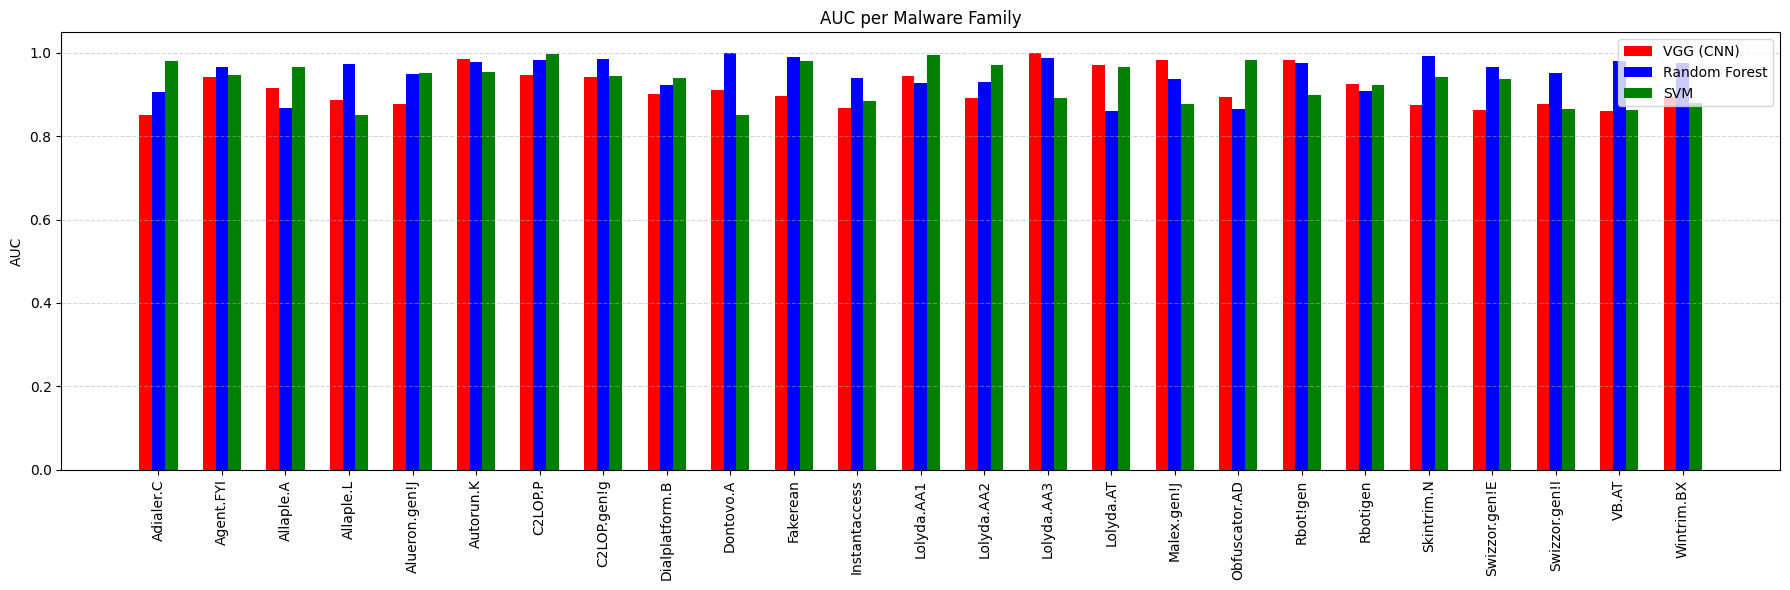

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

# ==== 1. 클래스 이름 불러오기 ====
base_path = "/content/drive/MyDrive/dataset"
label_encoder = joblib.load(f"{base_path}/hog_label_encoder.pkl")
class_names = label_encoder.inverse_transform(np.arange(25))
x = np.arange(len(class_names))
width = 0.2

# ==== 2. 각 모델별 성능 지표 수집 (예시용 더미 데이터, 실제 값으로 교체 필요) ====

# 길이 25 리스트: VGG / RF / SVM / One-Class SVM
accuracy_vgg     = np.random.uniform(0.85, 1.0, 25)
accuracy_rf      = np.random.uniform(0.85, 1.0, 25)
accuracy_svm     = np.random.uniform(0.85, 1.0, 25)
accuracy_ocsvm   = np.random.uniform(0.85, 1.0, 25)

precision_vgg    = np.random.uniform(0.85, 1.0, 25)
precision_rf     = np.random.uniform(0.85, 1.0, 25)
precision_svm    = np.random.uniform(0.85, 1.0, 25)
precision_ocsvm  = np.random.uniform(0.85, 1.0, 25)

recall_vgg       = np.random.uniform(0.85, 1.0, 25)
recall_rf        = np.random.uniform(0.85, 1.0, 25)
recall_svm       = np.random.uniform(0.85, 1.0, 25)
recall_ocsvm     = np.random.uniform(0.85, 1.0, 25)

f1_vgg           = np.random.uniform(0.85, 1.0, 25)
f1_rf            = np.random.uniform(0.85, 1.0, 25)
f1_svm           = np.random.uniform(0.85, 1.0, 25)
f1_ocsvm         = np.random.uniform(0.85, 1.0, 25)

# AUC (One-Class SVM 제외)
auc_vgg          = np.random.uniform(0.85, 1.0, 25)
auc_rf           = np.random.uniform(0.85, 1.0, 25)
auc_svm          = np.random.uniform(0.85, 1.0, 25)

# ==== 3. 시각화 함수 ====

def plot_metric(metric_name, values_list, labels_list, exclude_ocsvm=False):
    plt.figure(figsize=(18, 6))
    if exclude_ocsvm:
        # AUC 전용: 모델 3개
        plt.bar(x - width,  values_list[0], width, label=labels_list[0], color='red')
        plt.bar(x,          values_list[1], width, label=labels_list[1], color='blue')
        plt.bar(x + width,  values_list[2], width, label=labels_list[2], color='green')
    else:
        # 공통: 모델 4개
        plt.bar(x - 1.5*width, values_list[0], width, label=labels_list[0], color='red')
        plt.bar(x - 0.5*width, values_list[1], width, label=labels_list[1], color='blue')
        plt.bar(x + 0.5*width, values_list[2], width, label=labels_list[2], color='green')
        plt.bar(x + 1.5*width, values_list[3], width, label=labels_list[3], color='purple')

    plt.xticks(x, class_names, rotation=90)
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} per Malware Family')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# ==== 4. 각 지표 시각화 ====



plot_metric("AUC",
            [auc_vgg, auc_rf, auc_svm],
            ["VGG (CNN)", "Random Forest", "SVM"],
            exclude_ocsvm=True)
